In [1]:
#=======================================================================================
#警告：原始数据的实际意义均经过脱敏，所有数据仅供数据分析案例使用，不能作为商业用途参考。
#数据集：烟草、卷烟工艺、客户信息表、短期绩效、商品材质等
#=========================================================================================

#导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn import linear_model
%matplotlib inline
#中文显示
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False

#使用pandas读取数据支持xls和xlsx
data=pd.read_excel(r"C:\\Users\\有福有德\\Desktop\\上海统计分析python20200418\\data\\烟草.xlsx")
data.head(6)#显示数据开头6行
# data.info()

,date,总耗,产量,单耗,质量控制,班次,机器类型,品牌
0,2013-06-27 00:06:40,1.252763,3.001,0.000000,二组控制室,晚班,卷烟机@1,其他
1,2013-06-27 00:06:40,3.912023,3.251,9.082621,一组控制室,勤外组,卷烟机@1,其他
2,2013-06-27 00:06:40,3.401197,46.751,6.575872,三组控制室,早班,卷烟机@1,其他
3,2013-06-27 00:06:40,3.109061,52.726,6.390700,二组控制室,晚班,卷烟机@2,红塔山
4,2013-06-27 00:06:40,3.044522,74.751,6.738396,三组控制室,早班,卷烟机@2,红塔山
5,2013-06-27 00:06:40,2.484907,81.826,6.421652,三组控制室,早班,卷烟机@3,羊城


In [2]:
from scipy.stats import ttest_ind as ttest, levene
from scipy import stats
#异方差检验-部门
bgroup1=data[data["班次"]=='早班']["总耗"]
bgroup2=data[data["班次"]=='晚班']["总耗"]
# levene(bgroup1,bgroup2)
# #单样本t检验
# stats.ttest_1samp(data["总耗"],3)
#独立样本t检验-性别
ttest(bgroup1,bgroup2,equal_var=False)#equal_var=True

Ttest_indResult(statistic=-1.0935840682920928, pvalue=0.2741819213824044)

              df     sum_sq  mean_sq       F  PR(>F)
品牌           6.0    380.517   63.420  56.447   0.000
质量控制         2.0     21.656   10.828   9.637   0.000
班次           2.0      1.619    0.809   0.720   0.487
班次:质量控制      4.0     53.043   13.261  11.803   0.000
Residual  8985.0  10094.892    1.124     NaN     NaN


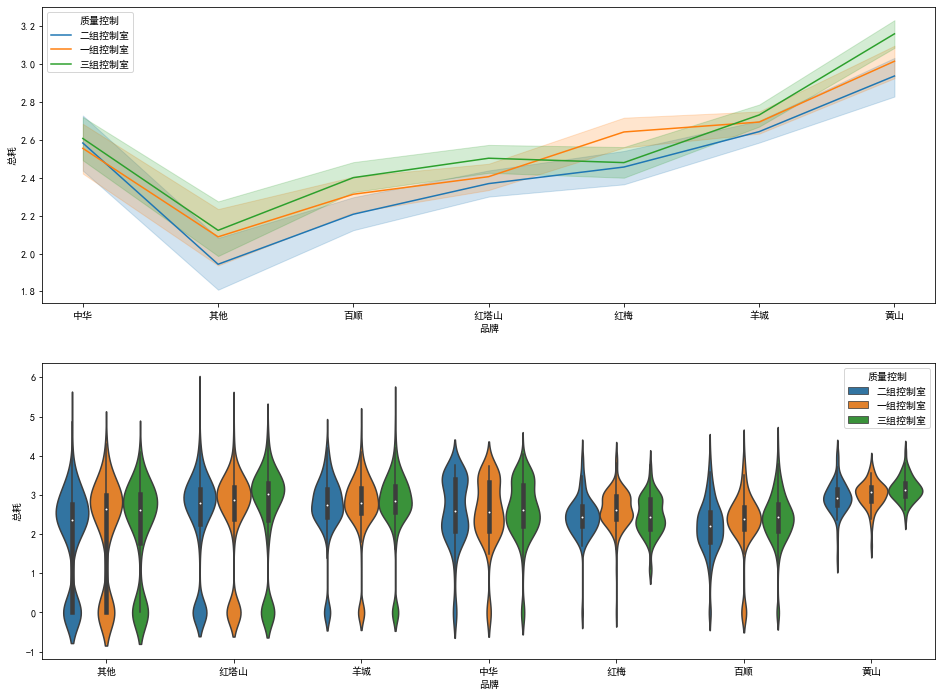

In [17]:

#方差分析——多因素和交互
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)

modelols=smf.ols("总耗~品牌+质量控制+班次+班次*质量控制",data=data).fit()
anova=anova_lm(modelols)
print(np.round(anova,3))

# print("部门事后检验",pairwise_tukeyhsd(data['总耗'],data['品牌']))#y和x的位置需要固定
# print("性别事后检验",pairwise_tukeyhsd(data['总耗'],data['品牌']))

import seaborn as sns
fig,ax=plt.subplots(2,1,figsize=(16,12))
sns.lineplot(x="品牌",y="总耗",hue="质量控制",data=data,ax=ax[0])#交互效应图
sns.violinplot(x="品牌",y="总耗",hue="质量控制",data=data,ax=ax[1])